<a href="https://colab.research.google.com/github/WendyOira/FINANCIAL-INCLUSION-ANALYSIS/blob/main/CORE_WEEK2_INDEPENDENTPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**FINSCOPE DATA ANALYSIS**

##**Defining the Question**

**a) Specifying the Data Analytic Question**

Which individuals are most likely to have or use a bank account?

**b) Defining the Metric for Success**

Help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**c) Understanding the context**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth

**d) Recording the Experimental Design**

Below are the steps we took to implement this solution


1.   Business Understanding:This sheds light to the context of the research question we are trying to answer ensures we keep the focus during the data analysis so that we meet the intended objectives
2.   Reading the data: Read the data with the aim to understand the content in our dataset
3. Checking our data: We perfomed this step so that we could get details about our dataset like number of rows and columns and null values
4. Data cleaning: We performed the data cleaning and preparation to make our data ready for analysis
5. Challenged the solution

**e) Data Relevance**

This data was extracted from various Finscope surveys through the following links:

Variable Definitions: http://bit.ly/VariableDefinitions


Dataset: http://bit.ly/FinancialDataset 

## 1. Import Libraries

In [264]:
# Lets start with importing the relevant libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Reading the data

In [265]:
# Load the variable definitions from the given link
#
definition=pd.read_csv("http://bit.ly/VariableDefinitions")
#
# Lets preview the data
definition

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [266]:
# Load the dataset from the given link
#
df=pd.read_csv("http://bit.ly/FinancialDataset")

In [267]:
# View the first five rows
# 
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [268]:
# View the last five rows 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## 3. Checking the data

In [269]:
# Confirm number of rows and columns in our dataframe
#
df.shape

(23524, 13)

We have 23,524 rows and 13 columns

In [270]:
# Confirm our dataframe's information
#
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [271]:
# Let's view the dataframe's statistical details
#
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [272]:
# Let's check the column names
#
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [273]:
# Let's check for any missing values
#
df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [274]:
# Let's check the number of missing values in each column
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [275]:
# Let's confirm the total number of null values
#
df.isnull().sum().sum()

267

We have 267 null values in our dataframe

In [276]:
# Let's check for any duplicate values
#
df.duplicated().any()

False

We have no duplicates in our dataframe

## 4. Data Cleaning

In [277]:
# We had detected 267  missing values in our dataframe
# Lets show our findings again below
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [278]:
# Dealing with missing values 
# Since the rows containing missing values are not abundant compared to the total number or rows in our dataframe
# Hence will delete null values
# 
df.dropna(inplace=True)

In [279]:
# Let's confirm if we still have any null values
#
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

We have no null values

In [280]:
# Let's check the new shape of our dataframe 
# Previously it was (23,524,13)
#
df.shape

(23343, 13)

In [281]:
# We will convert the 'year' column data type from integer to datetime
# We will first start by importing datetime module
#
from datetime import datetime
df['year']=pd.to_datetime(df['year'],format='%Y')
# Confirm the changes made
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [282]:
# Confirm changes in the datatype
#
df.dtypes

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object

In [283]:
# Let's rename our columns 
#
df.rename(columns={'Has a Bank account':'Bank_account','Type of Location': 'Location','Cell Phone Access': 'Cellphone_access', 
                   'Respondent Age': 'Age','gender_of_respondent': 'Gender','The relathip with head':'Relationship_with_head',
                   'Level of Educuation': 'Education_level','Type of Job': 'Job_type'}, inplace = True)

In [284]:
# Confirm the changes made
#
df.columns

Index(['country', 'year', 'uniqueid', 'Bank_account', 'Location',
       'Cellphone_access', 'household_size', 'Age', 'Gender',
       'Relationship_with_head', 'marital_status', 'Education_level',
       'Job_type'],
      dtype='object')

In [285]:
# Let's change the cases of the column names
#
df.columns=df.columns.str.capitalize()
# Confirm the changes
df.columns

Index(['Country', 'Year', 'Uniqueid', 'Bank_account', 'Location',
       'Cellphone_access', 'Household_size', 'Age', 'Gender',
       'Relationship_with_head', 'Marital_status', 'Education_level',
       'Job_type'],
      dtype='object')

In [286]:
# Check for anomalies
# Let's confirm the unique values in each of our columns
#
print(df.Country.unique())
print(df.Year.unique())
print(df.Uniqueid.unique())
print(df.Bank_account.unique())
print(df.Location.unique())
print(df.Cellphone_access.unique())
print(df.Household_size.unique())
print(df.Age.unique())
print(df.Gender.unique())
print(df.Relationship_with_head.unique())
print(df.Marital_status.unique())
print(df.Education_level.unique())
print(df.Job_type.unique())

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
['2018-01-01T00:00:00.000000000' '2029-01-01T00:00:00.000000000'
 '2056-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2039-01-01T00:00:00.000000000' '2017-01-01T00:00:00.000000000']
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
['Yes' 'No']
['Rural' 'Urban']
['Yes' 'No']
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]
['Female' 'Male']
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
[

Notable anomalies:



1.   Date the survey was conducted was between 2016 and 2018 yet we have years  like 2029,2056 and 2039
2.   Household size cannot be 0
3.   We cannot have a level of education of 6




In [287]:
# We will remove the anomalies in 'Years' column
df=df[(df['Year']<= '2018')]
# Confirm changes above
df.Year.unique()

array(['2018-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [288]:
# We will remove the anomalies in 'Household_size' column
df['Household_size'].replace({0:1}, inplace=True)
# Confirm changes above
print(df.Household_size.unique())

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. 18.
 17. 20.]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [289]:
# We will remove the anomalies in 'Education_level' column
df['Education_level'].replace({'6':'Other/Dont know/RTA'}, inplace=True)
# Confirm changes above
print(df.Education_level.unique())

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']


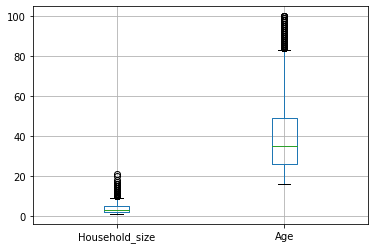

In [290]:
# Let's check for outliers
#
boxplot=df.boxplot(column=['Household_size','Age'])

We will proceed without deleting the outliers because it makes sense to have large households because the survey covers individuals in rural areas. Age also spans a variey of values. 

## Univariate Analysis

In [291]:
# Frequency Tables
# Let's start with Country 
#
df.Country.value_counts()

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: Country, dtype: int64

Rwanda is the country with the most participants

In [292]:
# Gender
df.Gender.value_counts()

Female    13766
Male       9574
Name: Gender, dtype: int64

Most people who participated in the survey are female 

In [293]:
# Relationship_with_head 
df.Relationship_with_head.value_counts()

Head of Household      12729
Spouse                  6470
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: Relationship_with_head, dtype: int64

Most people who participated in the survey are the heads of their households

In [294]:
# Marital_status
df.Marital_status.value_counts()

Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: Marital_status, dtype: int64

Most people who participated in the survey are Married/Living together

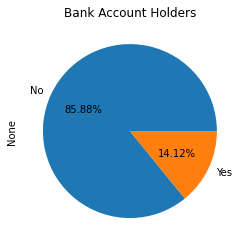

In [295]:
df.groupby('Bank_account').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Bank Account Holders')
plt.show()

Most participants are not bank account holders

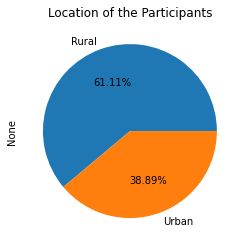

In [296]:
df.groupby('Location').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Location of the Participants')
plt.show()

Most participants live in rural arears

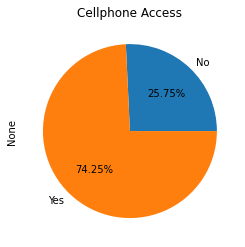

In [297]:
df.groupby('Cellphone_access').size().plot(kind='pie', autopct='%.2f%%')
plt.title('Cellphone Access')
plt.show()

Most Participants have cellphone access

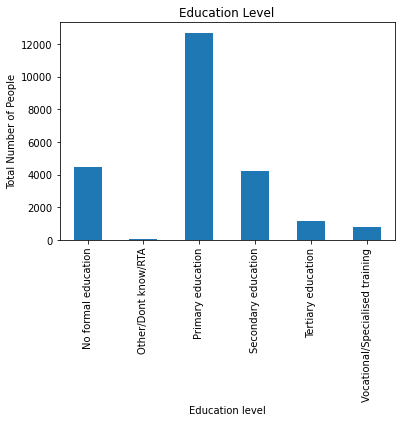

In [298]:
# Bar charts 
#
df.groupby('Education_level').size().plot(kind='bar')
plt.title('Education Level')
plt.ylabel('Total Number of People')
plt.xlabel('Education level')
plt.show()

Most participants are people who have only attained primary school level of education

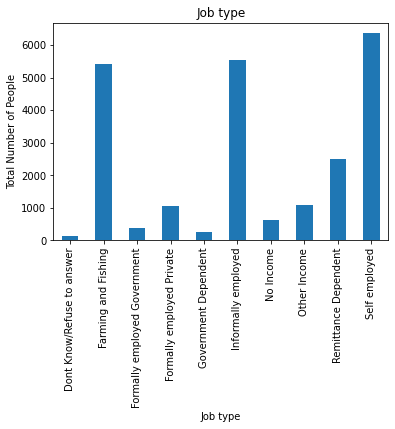

In [299]:
df.groupby('Job_type').size().plot(kind='bar')
plt.title('Job type')
plt.ylabel('Total Number of People')
plt.xlabel('Job type')
plt.show()

Most participants are self employed

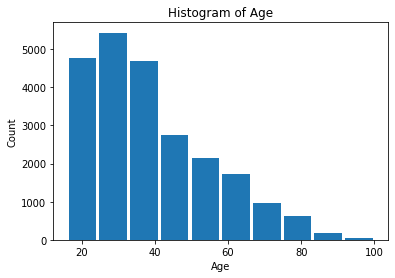

In [300]:
# Histogram
age=df['Age']
plt.hist(age, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age') 
plt.show()

Age is positively skewed

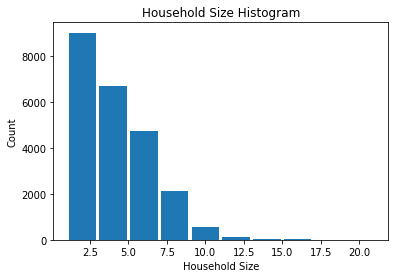

In [301]:
householdsize=df['Household_size']
plt.hist(householdsize, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title('Household Size Histogram') 
plt.show()

Household size is also positively skewed

In [302]:
# Measure of Central tendancy
# We will calculate the mode, median and mean of our numerical variables i.e Age and Household size
# Mode
#
df[['Age','Household_size']].mode()

,Age,Household_size
0,30.0,2.0


In [303]:
# Median
#
df[['Age','Household_size']].median()

Age               35.0
Household_size     3.0
dtype: float64

In [304]:
# Mean
#
df[['Age','Household_size']].mean()

Age               38.807069
Household_size     3.690103
dtype: float64

In [305]:
# Measure of Dispersion
# Range for Age
#
age_range= df['Age'].max()-df['Age'].min()
age_range

84.0

In [306]:
# Range for Household size
#
household_range= df['Household_size'].max()-df['Household_size'].min()
household_range

20.0

In [307]:
# Quantiles
# Quantiles for Age 
#
df['Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Age, dtype: float64

In [308]:
# IQR for Age 
# 
print(49-26)

23


In [309]:
# Quantiles for Household size
#
df['Household_size'].quantile([0.25,0.5,0.75])


0.25    2.0
0.50    3.0
0.75    5.0
Name: Household_size, dtype: float64

In [310]:
# IQR for Household size
# 
print(5-2)


3


In [311]:
# Standard deviation
# We will calculate the standard deviation for age and household size
#
df[['Household_size','Age']].std()

Household_size     2.279117
Age               16.519905
dtype: float64

In [312]:
# Variance
# We will calculate the variance for age and household size
#
df[['Household_size','Age']].var()

Household_size      5.194375
Age               272.907247
dtype: float64

In [313]:
# Skewness
# Determine the skewness of age and household size
#
df[['Household_size','Age']].skew()

Household_size    0.978928
Age               0.840615
dtype: float64

Both variables have positively skewed distribution

In [314]:
# Kurtosis
# Determine the kurtosis of age and household size
#
df[['Household_size','Age']].kurt()

Household_size    1.159338
Age               0.098268
dtype: float64

Household size has a leptokurtic distribution

Age has a leptokurtic distribution

## Bivariate Analysis

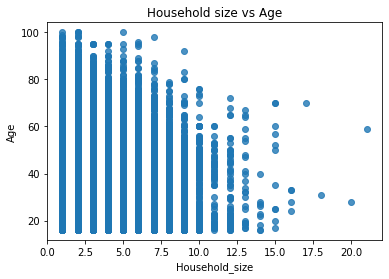

In [315]:
# Scatter Plots
# Identify correlation between Household size and Age
sns.regplot(x = df['Household_size'], y = df['Age'], fit_reg=False)
plt.title('Household size vs Age')
plt.show()

In [316]:
# Calculate the pearson correlation coefficient
#
df['Age'].corr(df['Household_size'])

-0.11908235076249986

The variables have a weak negative correlation

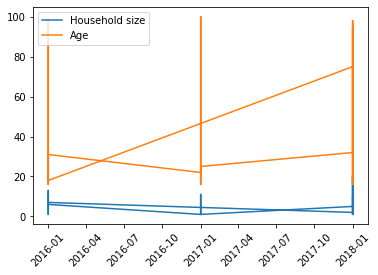

In [317]:
# Line Charts
x= df['Year']
y1= df['Household_size']
y2= df['Age']
plt.plot(x,y1, label='Household size')
plt.plot(x,y2, label='Age')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

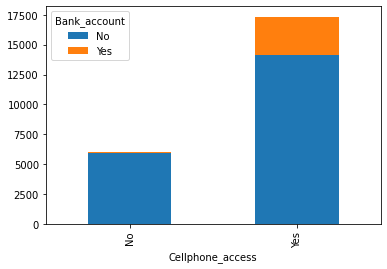

In [318]:
# Stacked column charts
df.groupby(['Cellphone_access','Bank_account']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Most people with cellphone access are also bank account holders

Hypothesis Testing

I will use the Chi-square test to identify relationships between bank account and other categorical variables.

Lets start the process off by creating crosstabs

In [319]:
# Crosstabs
#
acc= df['Bank_account']
loc=df['Location']
locationcross= pd.crosstab(loc,acc)
locationcross

Bank_account,No,Yes
Location,,
Rural,12600,1663
Urban,7444,1633


Rural area has the highest number of bank account holders

In [320]:
gen=df['Gender']
gendercross= pd.crosstab(gen,acc)
gendercross

Bank_account,No,Yes
Gender,,
Female,12286,1480
Male,7758,1816


Male gender has the highest number of bank account holders

In [321]:
cell= df['Cellphone_access']
cellcross= pd.crosstab(cell,acc)
cellcross

Bank_account,No,Yes
Cellphone_access,,
No,5905,104
Yes,14139,3192


People with cellphone access account for the highest number of bank account holders

In [322]:
rel=df['Relationship_with_head']
relcross= pd.crosstab(rel,acc)
relcross

Bank_account,No,Yes
Relationship_with_head,,
Child,2028,193
Head of Household,10471,2258
Other non-relatives,169,20
Other relative,597,65
Parent,1004,65
Spouse,5775,695


Most account holders are Heads of their households

In [323]:
status= df['Marital_status']
statuscross=pd.crosstab(status,acc)
statuscross

Bank_account,No,Yes
Marital_status,,
Divorced/Seperated,1817,232
Dont know,6,2
Married/Living together,8838,1860
Single/Never Married,6943,959
Widowed,2440,243


Most account holders are married/living together

In [324]:
level= df['Education_level']
levelcross= pd.crosstab(level,acc)
levelcross

Bank_account,No,Yes
Education_level,,
No formal education,4291,176
Other/Dont know/RTA,24,11
Primary education,11605,1083
Secondary education,3225,981
Tertiary education,554,589
Vocational/Specialised training,345,456


Most account holders are people whose education level is up to primary education

In [325]:
job= df['Job_type']
jobcross= pd.crosstab(job,acc)
jobcross

Bank_account,No,Yes
Job_type,,
Dont Know/Refuse to answer,111,14
Farming and Fishing,4788,634
Formally employed Government,87,299
Formally employed Private,481,566
Government Dependent,197,50
Informally employed,5109,440
No Income,605,13
Other Income,881,196
Remittance Dependent,2268,240


Most account holders are self employed

In [326]:
country=df['Country']
countrycross= pd.crosstab(country,acc)
countrycross

Bank_account,No,Yes
Country,,
Kenya,4543,1519
Rwanda,7686,997
Tanzania,5901,599
Uganda,1914,181


Most account holders are in Kenya

In [327]:
age1=df['Age']
agecross= pd.crosstab(age1,acc)
agecross

Bank_account,No,Yes
Age,,
16.0,454,5
17.0,464,10
18.0,562,21
19.0,438,28
20.0,586,36
...,...,...
96.0,3,0
97.0,1,0
98.0,6,0


In [328]:
hold=df['Household_size']
holdcross= pd.crosstab(hold,acc)
holdcross

Bank_account,No,Yes
Household_size,,
1.0,3292,672
2.0,4445,627
3.0,3010,503
4.0,2728,471
5.0,2304,412
6.0,1760,268
7.0,1201,177
8.0,655,85
9.0,318,36


In [329]:
# We will use the Chi-squared test of independence to perform hypothesis testing 
# between categorical variables
#
# Null hypothesis:There is no relationship between location and bank account 
# Alternative hypothesis:There is a relationship between location and bank account
#
# Import relevant library
from scipy.stats import chi2_contingency

In [330]:
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(locationcross)
chiVal,pVal,d,exp

(182.8048539167342,
 1.1831299759708535e-41,
 1,
 array([[12248.82485004,  2014.17514996],
        [ 7795.17514996,  1281.82485004]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between location and bank account holders

In [331]:
# Null hypothesis:There is no relationship between Cellphone access and bank account 
# Alternative hypothesis:There is a relationship between Cellphone access and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(cellcross)
chiVal,pVal,d,exp

(1023.1392173763973,
 1.6776103338033457e-224,
 1,
 array([[ 5160.42827763,   848.57172237],
        [14883.57172237,  2447.42827763]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between cellphone access and bank account holders

In [332]:
# Null hypothesis:There is no relationship between Gender and bank account 
# Alternative hypothesis:There is a relationship between Gender and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(gendercross)
chiVal,pVal,d,exp

(313.6976471873478,
 3.417686933735945e-70,
 1,
 array([[11822.00959726,  1943.99040274],
        [ 8221.99040274,  1352.00959726]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between gender and bank account holders

In [333]:
# Null hypothesis:There is no relationship between relationship with the head of household and bank account 
# Alternative hypothesis:There is a relationship between relationship with the head of household and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(relcross)
chiVal,pVal,d,exp

(321.37632166913426,
 2.5316623970983745e-67,
 5,
 array([[ 1907.35749786,   313.64250214],
        [10931.45141388,  1797.54858612],
        [  162.31002571,    26.68997429],
        [  568.51448158,    93.48551842],
        [  918.03924593,   150.96075407],
        [ 5556.32733505,   913.67266495]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between relationship with the head of household and bank account holders

In [334]:
# Null hypothesis:There is no relationship between relationship marital status and bank account 
# Alternative hypothesis:There is a relationship between relationship marital status and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(statuscross)
chiVal,pVal,d,exp

(190.47547971070537,
 4.189098063009839e-40,
 4,
 array([[1.75964679e+03, 2.89353213e+02],
        [6.87026564e+00, 1.12973436e+00],
        [9.18726272e+03, 1.51073728e+03],
        [6.78610488e+03, 1.11589512e+03],
        [2.30411534e+03, 3.78884662e+02]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between marital status and bank account holders

In [335]:
# Null hypothesis:There is no relationship between relationship education level and bank account 
# Alternative hypothesis:There is a relationship between relationship education level and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(levelcross)
chiVal,pVal,d,exp

(3539.91608493269, 0.0, 5, array([[3.83618458e+03, 6.30815424e+02],
        [3.00574122e+01, 4.94258783e+00],
        [1.08962413e+04, 1.79175870e+03],
        [3.61204216e+03, 5.93957841e+02],
        [9.81589203e+02, 1.61410797e+02],
        [6.87885347e+02, 1.13114653e+02]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between education level and bank account holders

In [336]:
# Null hypothesis:There is no relationship between relationship job type and bank account 
# Alternative hypothesis:There is a relationship between relationship job type and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(jobcross)
chiVal,pVal,d,exp

(2999.314013639475, 0.0, 9, array([[ 107.3479006 ,   17.6520994 ],
        [4656.32253642,  765.67746358],
        [ 331.49031705,   54.50968295],
        [ 899.14601542,  147.85398458],
        [ 212.11945159,   34.88054841],
        [4765.38800343,  783.61199657],
        [ 530.72802057,   87.27197943],
        [ 924.90951157,  152.09048843],
        [2153.82827763,  354.17172237],
        [5462.71996572,  898.28003428]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between job type and bank account holders

In [337]:
# Null hypothesis:There is no relationship between relationship country and bank account 
# Alternative hypothesis:There is a relationship between relationship country and bank account
#
# Chi-square test
chiVal,pVal,d,exp= chi2_contingency(countrycross)
chiVal,pVal,d,exp

(828.6311930137034,
 2.6709547856801585e-179,
 3,
 array([[5205.94378749,  856.05621251],
        [7456.81456727, 1226.18543273],
        [5582.09083119,  917.90916881],
        [1799.15081405,  295.84918595]]))

The p-value is less than 0.05, hence we will reject the null hypothesis. This means that there is an association between country and bank account holders

In [338]:
# We will use Z test to perform hypothesis testing between bank account and Age and bank account and Household size
# First we will find the variance, mean and count 
# Mean
#
df1_mean=df.groupby(['Bank_account']).mean().reset_index()
df1_mean

,Bank_account,Household_size,Age
0,No,3.711634,38.675763
1,Yes,3.559163,39.605583


In [339]:
# Variance
#
df1_Var=df.groupby(['Bank_account']).var().reset_index()
df1_Var

,Bank_account,Household_size,Age
0,No,5.238500,283.828059
1,Yes,4.907576,205.817681


In [340]:
# Count
#
df1_count=df.groupby(['Bank_account']).count().reset_index()
df1_count

,Bank_account,Country,Year,Uniqueid,Location,Cellphone_access,Household_size,Age,Gender,Relationship_with_head,Marital_status,Education_level,Job_type
0,No,20044,20044,20044,20044,20044,20044,20044,20044,20044,20044,20044,20044
1,Yes,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296,3296


In [341]:
# Null hypothesis: Mean of age is equal to mean of bank account
# Alternative: Mean of age is not equal to mean of bank account
#
# Age Z score 
z_age=(38.675763-39.605583)/np.sqrt(np.square(283.828059)/20044 + np.square(205.817681)/3296)
print(z_age)
#
# Find p-value
import scipy.stats
scipy.stats.norm.sf(abs(-0.22637301401701918))*2

-0.22637301401701918


0.8209113148795967

pvalue is greater that 0.05, we will accept the null hypothesis. This means there is a relationship between age and bank account

In [342]:
# Null hypothesis: Mean of household size is equal to mean of bank account
# Alternative: Mean of household size is not equal to mean of bank account
#
# Household size Z score 
z_house=z_age=(3.711634-3.559163)/np.sqrt(np.square(5.238500)/20044 + np.square(4.907576)/3296)
print(z_house)
#
# Find p-value
import scipy.stats
scipy.stats.norm.sf(abs(1.636900022638321))*2

1.636900022638321


0.10165136122059407

pvalue is greater that 0.05, we will accept the null hypothesis. This means there is a relationship between household size and bank account

##Multivariate Analysis

In [343]:
# Lets use PCA to perform dimension reduction
# Lets start by coverting our categorical variables into dummy variables through encoding
# Import the relevant libraries
from sklearn.preprocessing import LabelEncoder
#
cols = ['Country', 'Bank_account', 'Location', 'Cellphone_access', 'Gender', 'Relationship_with_head','Marital_status', 'Education_level', 'Job_type']
#
# Encode labels of multiple columns at once
#
df_1= df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_1.head()

,Country,Bank_account,Location,Cellphone_access,Gender,Relationship_with_head,Marital_status,Education_level,Job_type
0,0,1,0,1,0,5,2,3,9
1,0,0,0,0,0,1,4,0,4
2,0,1,1,1,1,3,3,5,9
3,0,0,0,1,0,1,2,2,3
4,0,0,1,0,1,0,3,2,5


In [344]:
# Results with 1 Feature Set
#
# Splitting the dataset into the Training set and Test set
X = df_1.drop(['Bank_account'], 1)
y = df_1['Bank_account']
#
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance
#
# Using 1 Principal Component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# 
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [345]:
# Results with 2 Feature Set
#
# Splitting the dataset into the Training set and Test set
X = df_1.drop(['Bank_account'], 1)
y = df_1['Bank_account']
#
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance
#
# Using 2 Principal Component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# 
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [346]:
# Results with all Feature Set
#
# Splitting the dataset into the Training set and Test set
X = df_1.drop(['Bank_account'], 1)
y = df_1['Bank_account']
#
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
# Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance
#
# Using all Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# 
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


From the above experimentation We saw that accuracy of 86.46% was met by 1, 2 and all the number of principal components. 

##Implementing the solution

From our analyis we can see that there is a relationship between the categorical data and bank account holders.

The categorical data includes: Cellphone access, Relationship with the head of household, Marital status, Education level, Type of job, Gender and Country

There is also a relationship between age and household size and bank account holders.

## Challenging the solution

There is a discrepancy in most account holders being individuals living in rural areas considering most banking institutions are in urban areas

##Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.

a). Did we have the right data? Yes

b). Do we need other data to answer our question? No

c). Did we have the right question? Yes
